# Image Data Preparation

## How to Load and Manipulate Images With PIL/Pillow

In [14]:
PATH = '/Users/test/Documents/Software-projects/Python Projects/Deep-Learning-Projects/Deep-Learning-Overfitting-Cook-Book/images/'

In [15]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open(PATH+'opera-house.jpeg')
# summarize some details about the image print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

RGB
(640, 360)


uint8
(360, 640, 3)


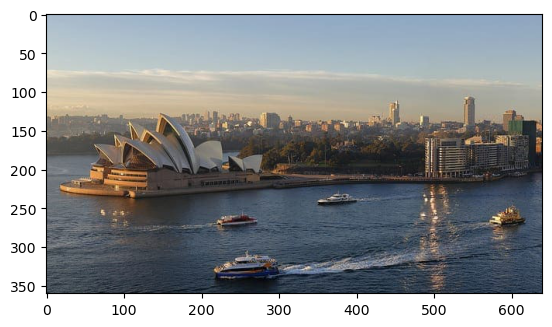

In [18]:
from matplotlib import pyplot
from matplotlib import image
# load image as pixel array
data = image.imread(PATH + 'opera-house.jpeg')
# summarize shape of the pixel array 
print(data.dtype)
print(data.shape)
# display the array of pixels as an image 
pyplot.imshow(data)
pyplot.show()

In [20]:

# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open(PATH + 'opera-house.jpeg') # convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details 
print(image2.format) 
print(image2.mode)
print(image2.size)

(360, 640, 3)
None
RGB
(640, 360)


In [22]:

# example of saving an image in another format
from PIL import Image
# load the image
image = Image.open(PATH + 'opera-house.jpeg')
# save as PNG format 
image.save('opera_house.png', format='PNG')
# load the image again and inspect the format 
image2 = Image.open('opera_house.png') 
print(image2.format)

PNG


In [23]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open(PATH + 'opera-house.jpeg')
# convert the image to grayscale
gs_image = image.convert(mode='L')
# save in jpeg format 
gs_image.save('opera_house_grayscale.jpeg')
# load the image again and show it
image2 = Image.open('opera_house_grayscale.jpeg') # show the image
image2.show()

## How to Resize Images

In [24]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open(PATH + 'opera-house.jpeg')
# report the size of the image 
print(image.size)
# create a thumbnail and preserve aspect ratio 
image.thumbnail((100,100))
# report the size of the modified image 
print(image.size)
# show the image
image.show()

(640, 360)
(100, 56)


In [25]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open(PATH + 'opera-house.jpeg')
# report the size of the image 
# report the size of the 
print(image.size)
# resize image and ignore original aspect ratio 
img_resized = image.resize((200,200))
# report the size of the thumbnail 
print(img_resized.size)
# show the image
img_resized.show()

(640, 360)
(200, 200)


## How to Flip, Rotate, and Crop Images

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_43241/2168518486.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(312)


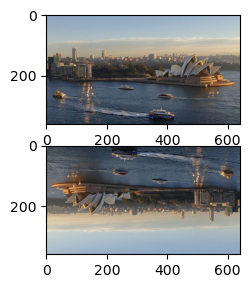

In [26]:
image = Image.open(PATH + 'opera-house.jpeg')
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT) # vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM) # plot all three images using matplotlib pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)
pyplot.show()

## Rotate Image

In [ ]:


# plot original image
pyplot.subplot(311)
pyplot.imshow(image)
# rotate 45 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(45))
# rotate 90 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(90))
pyplot.show()